In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "valle d'aosta"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,2,Valle d'Aosta,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00
1,2020-02-26T18:00:00,2,Valle d'Aosta,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00
2,2020-02-27T18:00:00,2,Valle d'Aosta,0,0,0,0,0,0,0,...,0.0,2.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00
3,2020-02-28T18:00:00,2,Valle d'Aosta,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00
4,2020-02-29T17:00:00,2,Valle d'Aosta,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2021-01-05T17:00:00,2,Valle d'Aosta,54,1,55,353,408,-2,21,...,0.0,262.0,435.0,7.0,1.82,13.48,8.02,4.83,0.0,-0.49
316,2021-01-06T17:00:00,2,Valle d'Aosta,54,1,55,352,407,-1,26,...,1.0,200.0,178.0,-1.0,1.82,13.51,13.00,14.61,0.0,-0.25
317,2021-01-07T17:00:00,2,Valle d'Aosta,57,1,58,376,434,27,33,...,0.0,230.0,90.0,24.0,1.72,13.36,14.35,36.67,0.0,6.63
318,2021-01-08T17:00:00,2,Valle d'Aosta,54,1,55,370,425,-9,25,...,0.0,254.0,89.0,-6.0,1.82,12.94,9.84,28.09,0.0,-2.07


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 9, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 22
Nuovi tamponi: 275.0
Percentuale nuovi positivi/nuovi tamponi: 8.0 %
Nuovi guariti: 10.0
Nuovi deceduti: 0.0
Variazione positivi ricoverati con sintomi: -4.0
Variazione positivi in terapia intensiva: 0.0
Variazione positivi in isolamento dimiciliare: 16.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 9, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-10T17:00:00,2,Valle d'Aosta,161,15,176,2123,2299,33,127,...,11.0,637.0,236.0,31.0,8.52,7.66,19.94,53.81,0.00,1.46
1,2020-11-11T17:00:00,2,Valle d'Aosta,160,17,177,2155,2332,33,125,...,7.0,743.0,330.0,32.0,9.60,7.59,16.82,37.88,13.33,1.44
2,2020-11-12T17:00:00,2,Valle d'Aosta,159,16,175,2163,2338,6,167,...,6.0,650.0,573.0,8.0,9.14,7.49,25.69,29.14,-5.88,0.26
3,2020-11-13T17:00:00,2,Valle d'Aosta,149,15,164,2199,2363,25,103,...,3.0,830.0,379.0,36.0,9.15,6.94,12.41,27.18,-6.25,1.07
4,2020-11-14T17:00:00,2,Valle d'Aosta,146,13,159,2140,2299,-64,245,...,6.0,797.0,289.0,-59.0,8.18,6.92,30.74,84.78,-13.33,-2.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-01-05T17:00:00,2,Valle d'Aosta,54,1,55,353,408,-2,21,...,0.0,262.0,435.0,7.0,1.82,13.48,8.02,4.83,0.00,-0.49
57,2021-01-06T17:00:00,2,Valle d'Aosta,54,1,55,352,407,-1,26,...,1.0,200.0,178.0,-1.0,1.82,13.51,13.00,14.61,0.00,-0.25
58,2021-01-07T17:00:00,2,Valle d'Aosta,57,1,58,376,434,27,33,...,0.0,230.0,90.0,24.0,1.72,13.36,14.35,36.67,0.00,6.63
59,2021-01-08T17:00:00,2,Valle d'Aosta,54,1,55,370,425,-9,25,...,0.0,254.0,89.0,-6.0,1.82,12.94,9.84,28.09,0.00,-2.07


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

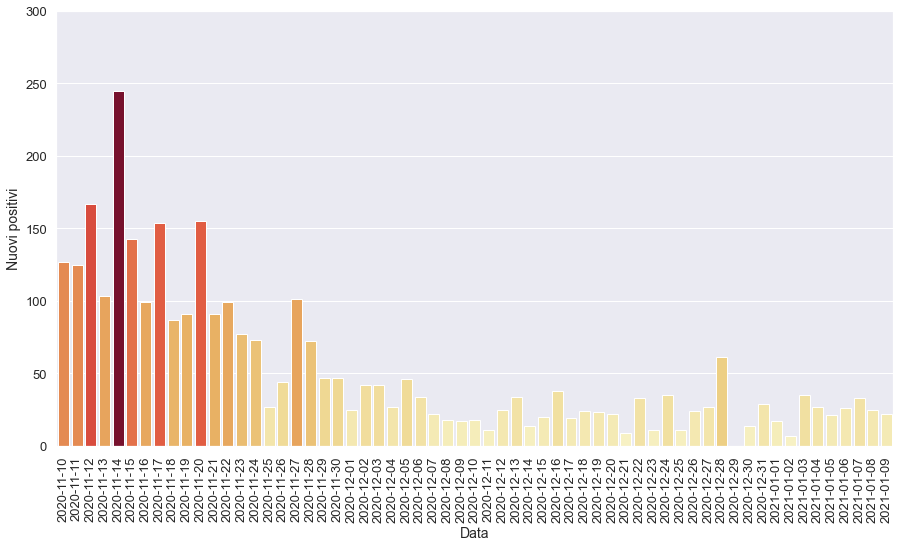

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

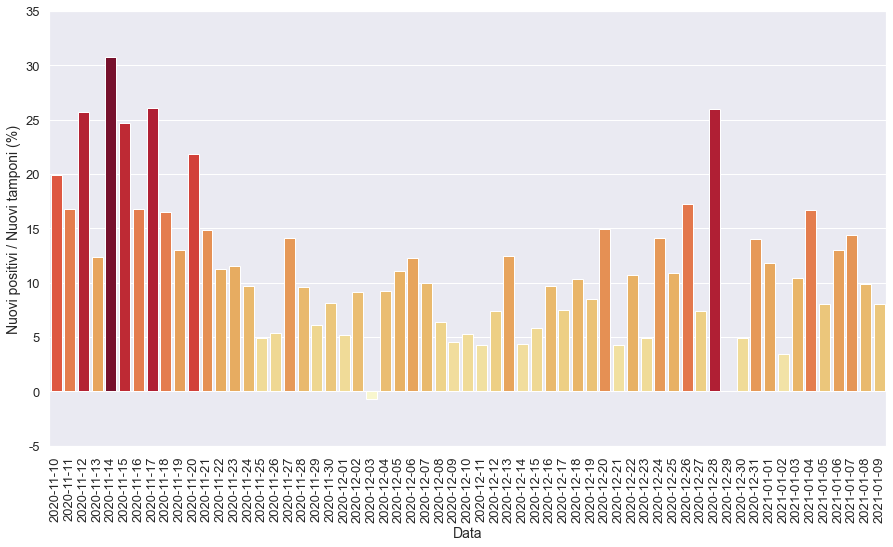

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

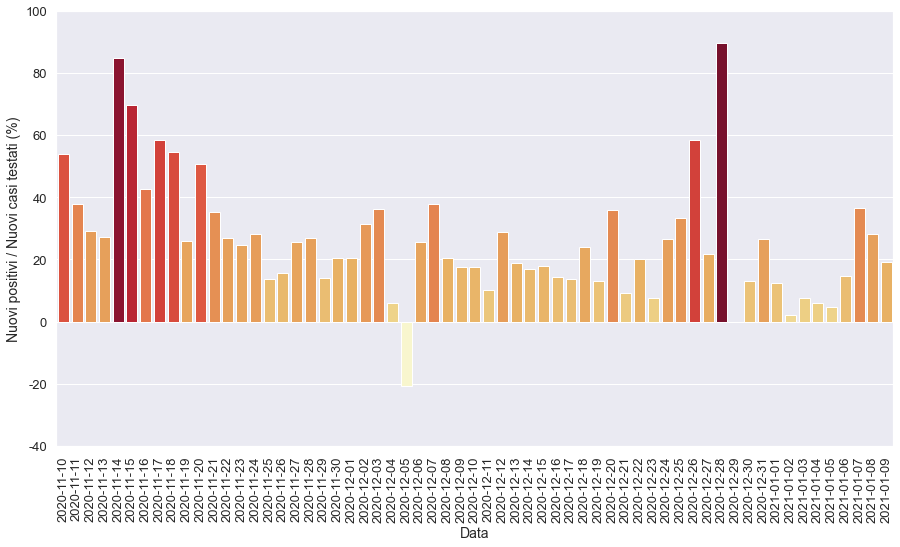

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

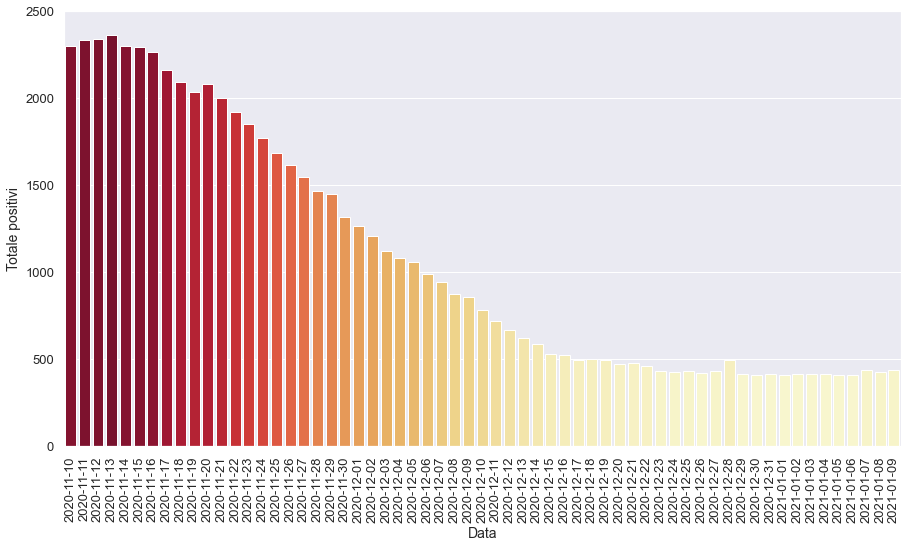

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

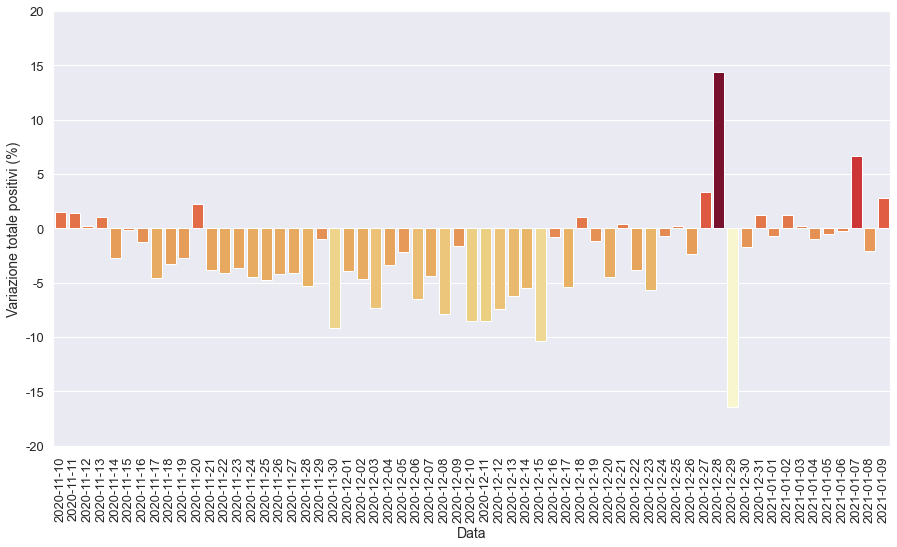

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

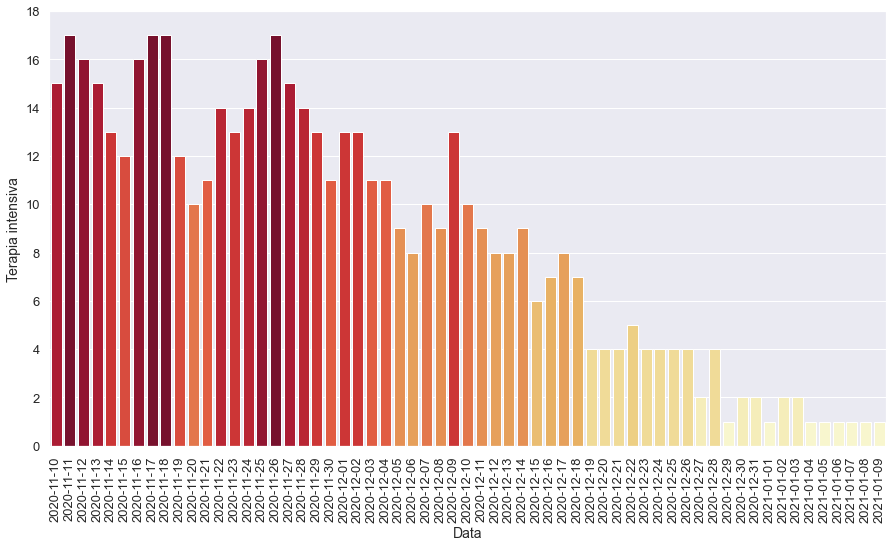

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

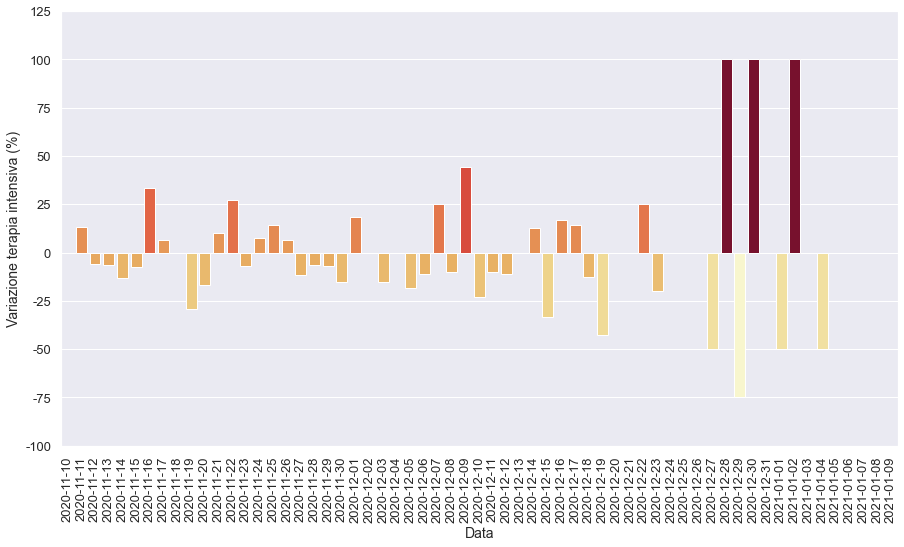

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

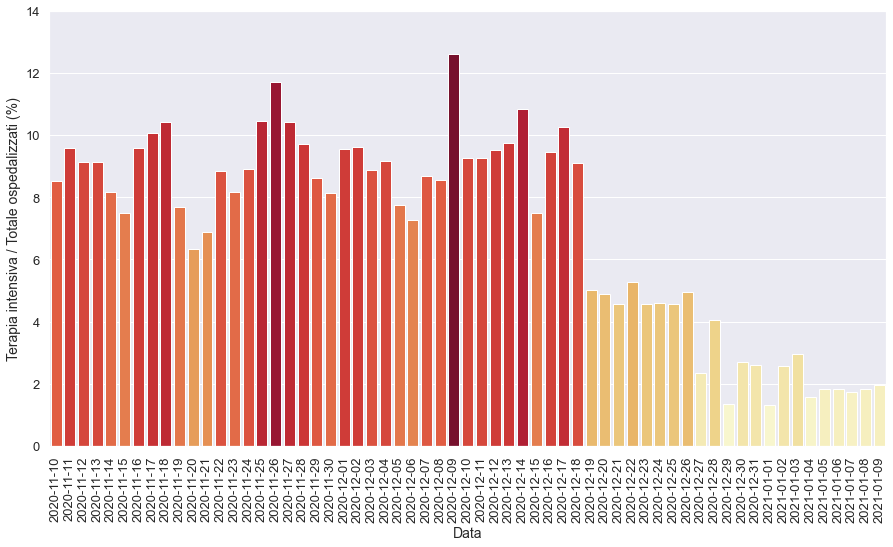

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

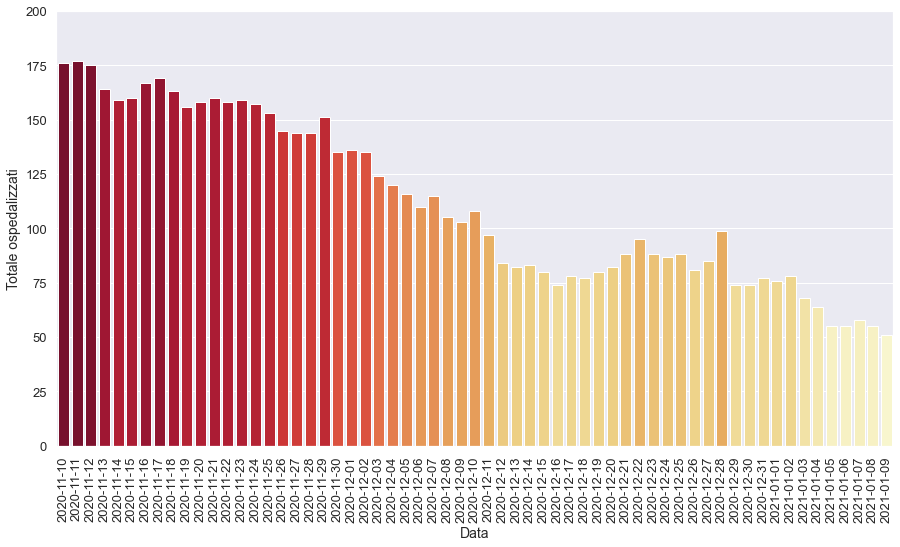

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

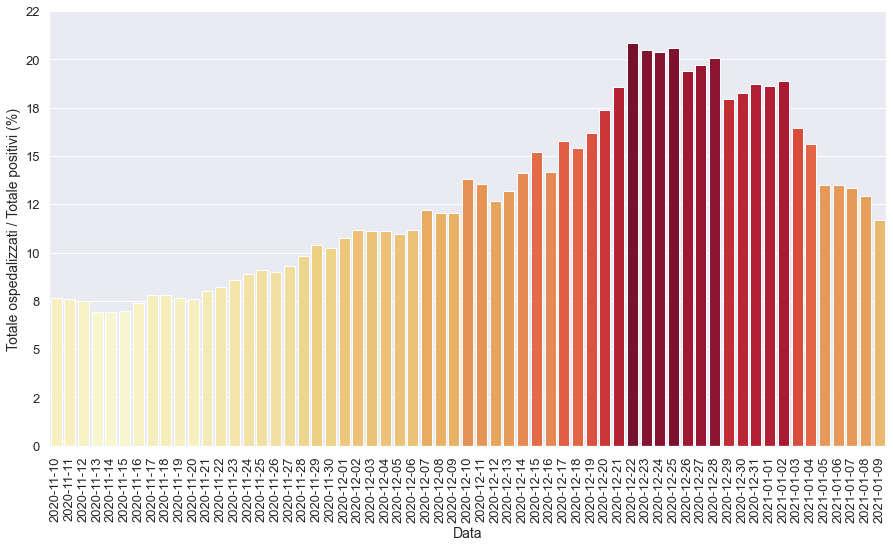

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

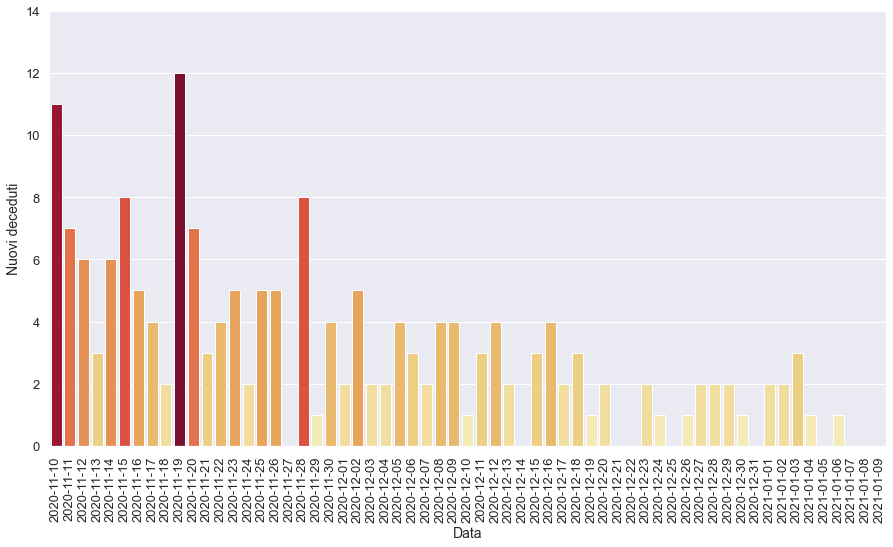

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

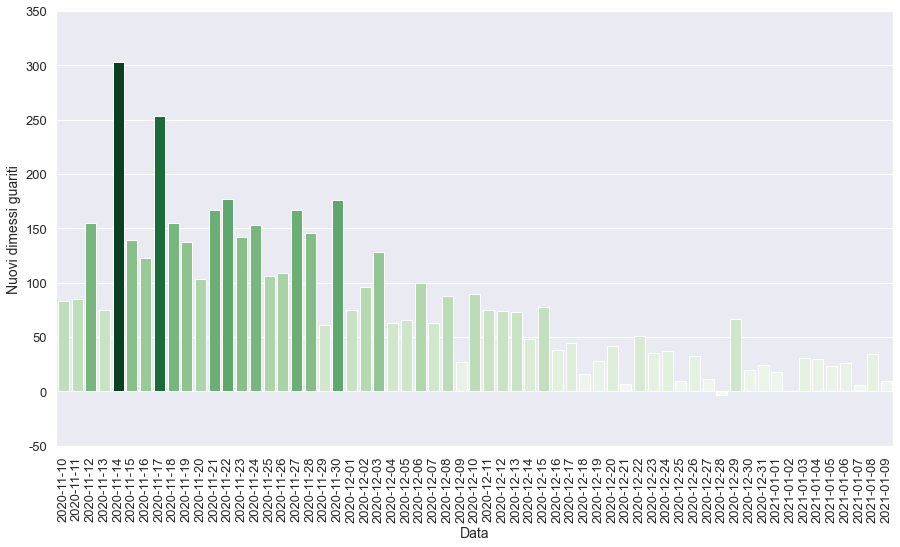

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-10T17:00:00,2,Valle d'Aosta,98,10,108,675,783,-73,18,...,1.0,342.0,102.0,-78.0,9.26,13.79,5.26,17.65,-23.08,-8.53
1,2020-12-11T17:00:00,2,Valle d'Aosta,88,9,97,619,716,-67,11,...,3.0,259.0,110.0,-56.0,9.28,13.55,4.25,10.00,-10.00,-8.56
2,2020-12-12T17:00:00,2,Valle d'Aosta,76,8,84,579,663,-53,25,...,4.0,336.0,87.0,-40.0,9.52,12.67,7.44,28.74,-11.11,-7.40
3,2020-12-13T17:00:00,2,Valle d'Aosta,74,8,82,540,622,-41,34,...,2.0,272.0,179.0,-39.0,9.76,13.18,12.50,18.99,0.00,-6.18
4,2020-12-14T17:00:00,2,Valle d'Aosta,74,9,83,505,588,-34,14,...,0.0,320.0,83.0,-35.0,10.84,14.12,4.38,16.87,12.50,-5.47
5,2020-12-15T17:00:00,2,Valle d'Aosta,74,6,80,447,527,-61,20,...,3.0,342.0,111.0,-58.0,7.50,15.18,5.85,18.02,-33.33,-10.37
6,2020-12-16T17:00:00,2,Valle d'Aosta,67,7,74,449,523,-4,38,...,4.0,393.0,266.0,2.0,9.46,14.15,9.67,14.29,16.67,-0.76
7,2020-12-17T17:00:00,2,Valle d'Aosta,70,8,78,417,495,-28,19,...,2.0,255.0,139.0,-32.0,10.26,15.76,7.45,13.67,14.29,-5.35
8,2020-12-18T17:00:00,2,Valle d'Aosta,70,7,77,423,500,5,24,...,3.0,233.0,100.0,6.0,9.09,15.40,10.30,24.00,-12.50,1.01
9,2020-12-19T17:00:00,2,Valle d'Aosta,76,4,80,414,494,-6,23,...,1.0,270.0,176.0,-9.0,5.00,16.19,8.52,13.07,-42.86,-1.20


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

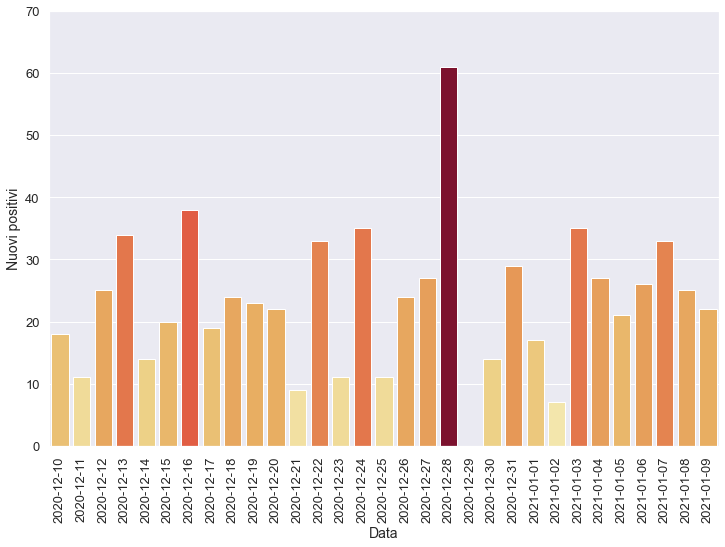

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

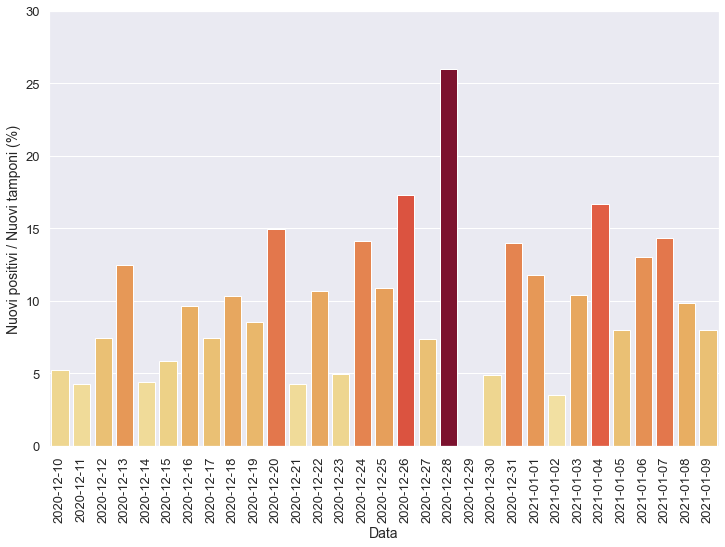

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

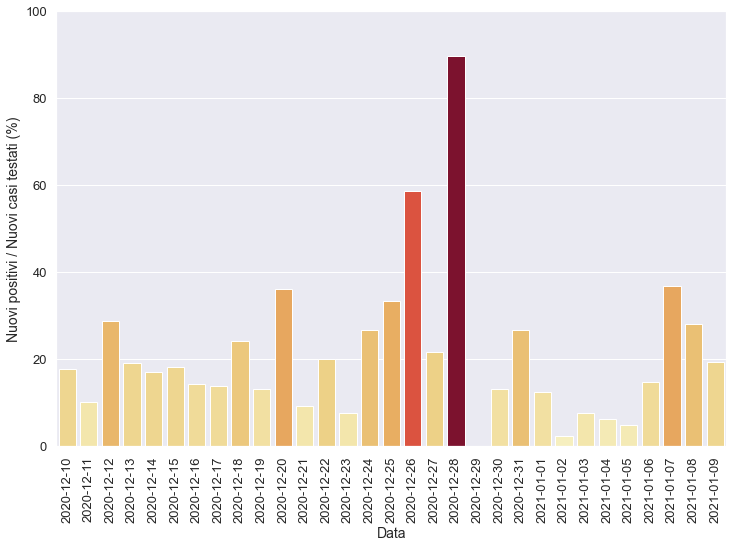

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

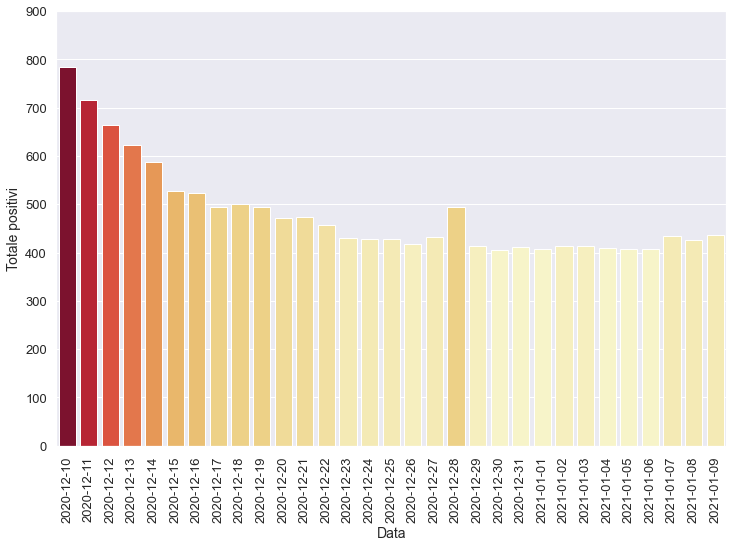

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

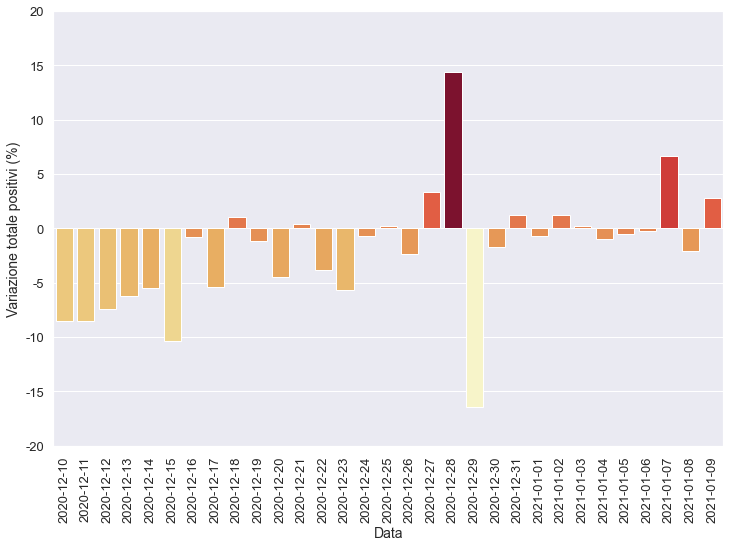

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

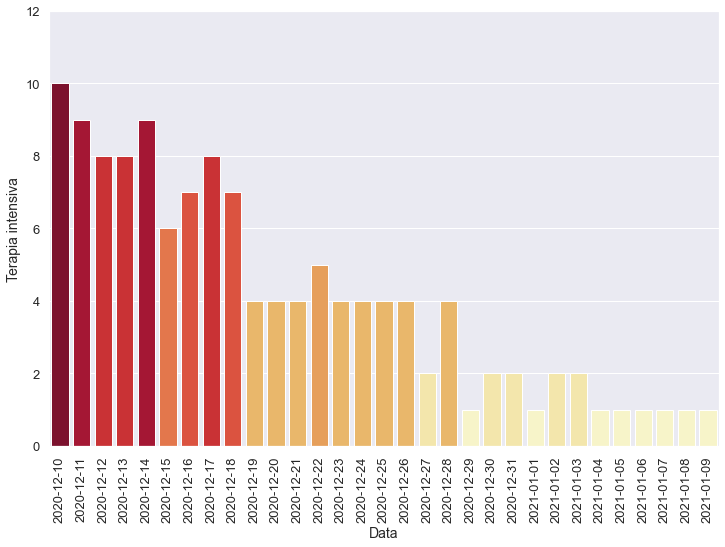

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

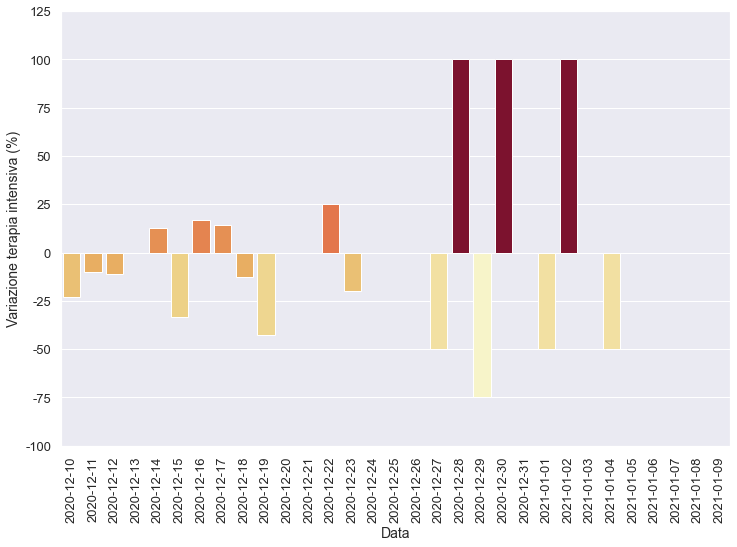

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

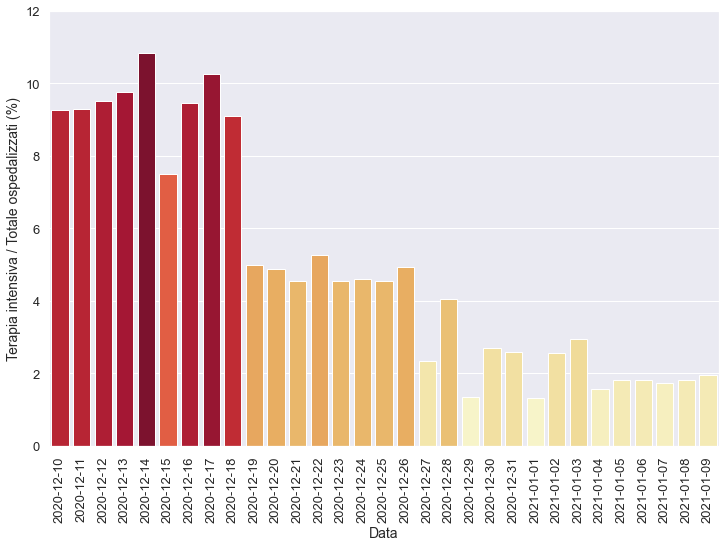

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

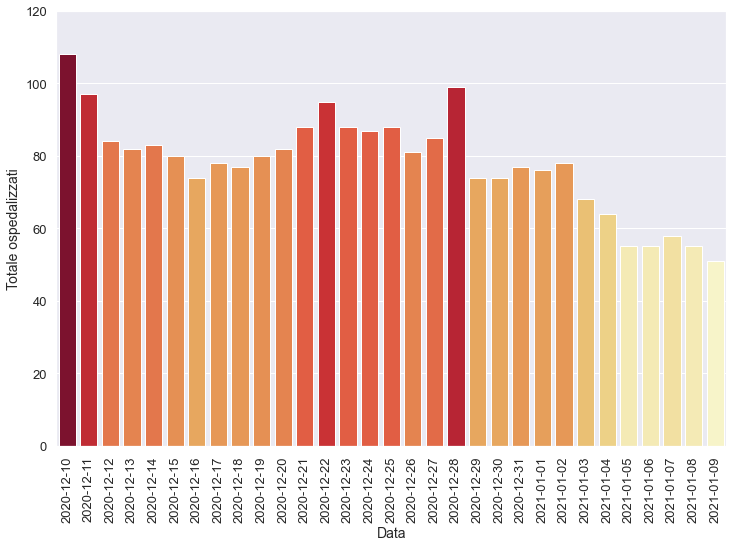

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

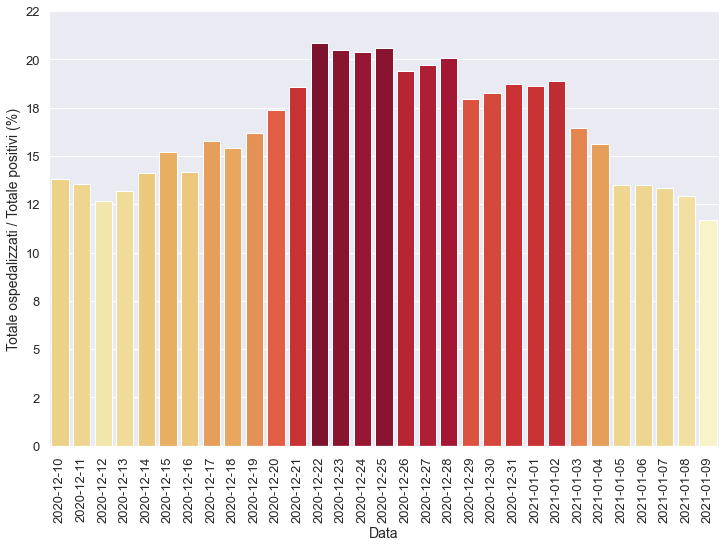

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

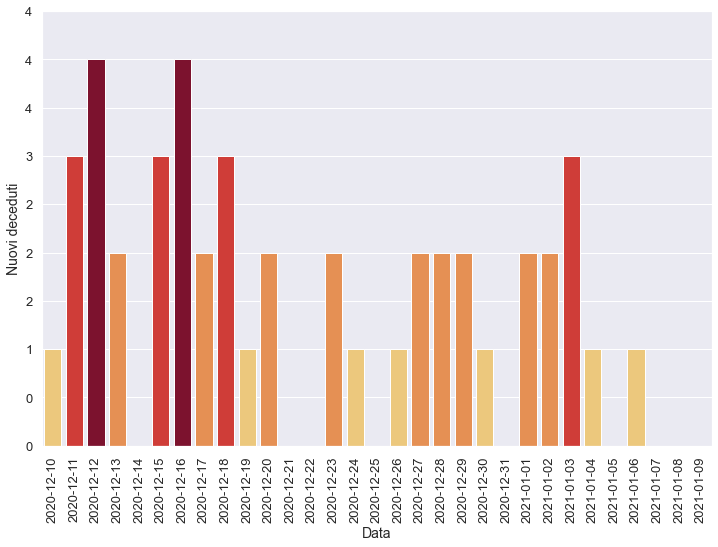

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

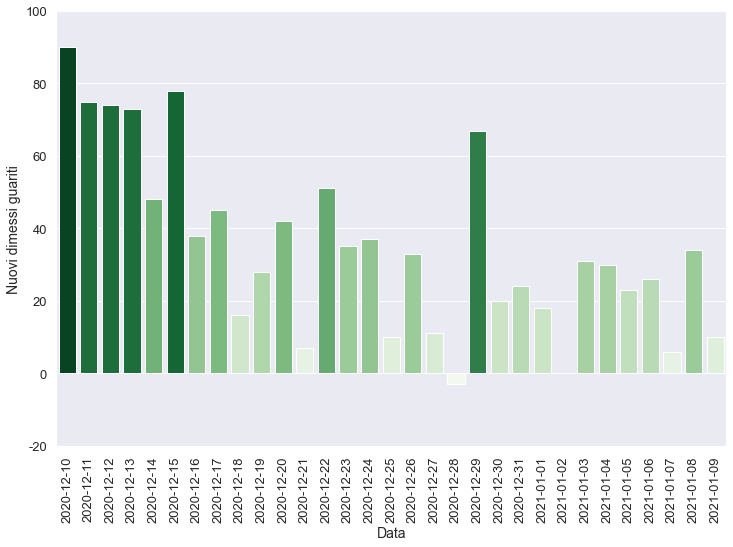

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-02T17:00:00,2,Valle d'Aosta,76,2,78,335,413,5,7,...,2.0,201.0,323.0,3.0,2.56,18.89,3.48,2.17,100.0,1.23
1,2021-01-03T17:00:00,2,Valle d'Aosta,66,2,68,346,414,1,35,...,3.0,337.0,461.0,11.0,2.94,16.43,10.39,7.59,0.0,0.24
2,2021-01-04T17:00:00,2,Valle d'Aosta,63,1,64,346,410,-4,27,...,1.0,162.0,446.0,0.0,1.56,15.61,16.67,6.05,-50.0,-0.97
3,2021-01-05T17:00:00,2,Valle d'Aosta,54,1,55,353,408,-2,21,...,0.0,262.0,435.0,7.0,1.82,13.48,8.02,4.83,0.0,-0.49
4,2021-01-06T17:00:00,2,Valle d'Aosta,54,1,55,352,407,-1,26,...,1.0,200.0,178.0,-1.0,1.82,13.51,13.00,14.61,0.0,-0.25
5,2021-01-07T17:00:00,2,Valle d'Aosta,57,1,58,376,434,27,33,...,0.0,230.0,90.0,24.0,1.72,13.36,14.35,36.67,0.0,6.63
6,2021-01-08T17:00:00,2,Valle d'Aosta,54,1,55,370,425,-9,25,...,0.0,254.0,89.0,-6.0,1.82,12.94,9.84,28.09,0.0,-2.07
7,2021-01-09T17:00:00,2,Valle d'Aosta,50,1,51,386,437,12,22,...,0.0,275.0,114.0,16.0,1.96,11.67,8.00,19.30,0.0,2.82


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

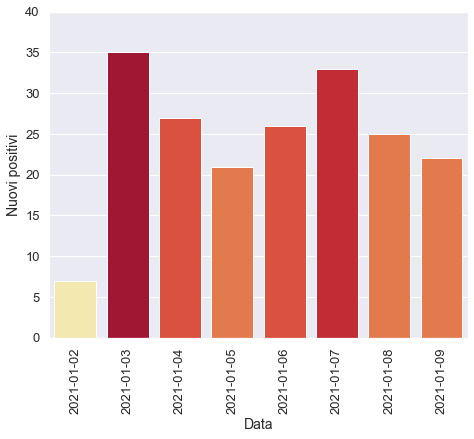

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

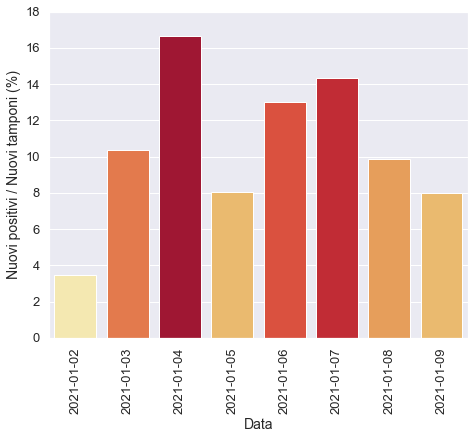

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

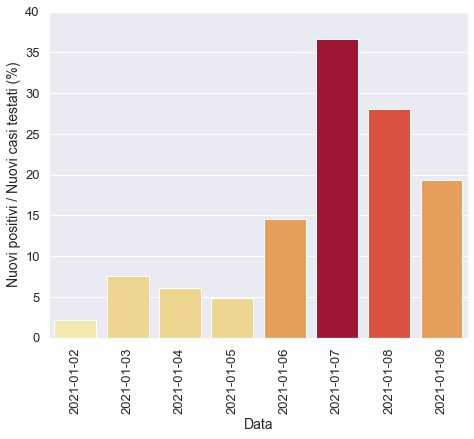

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

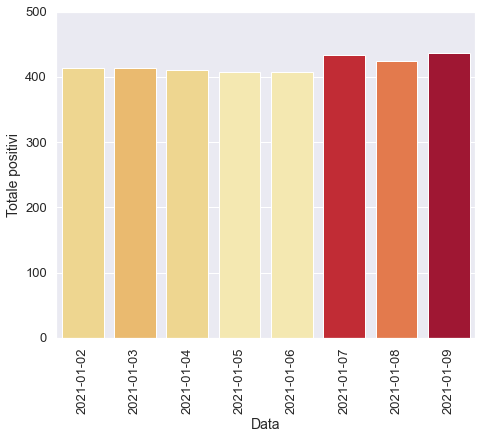

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

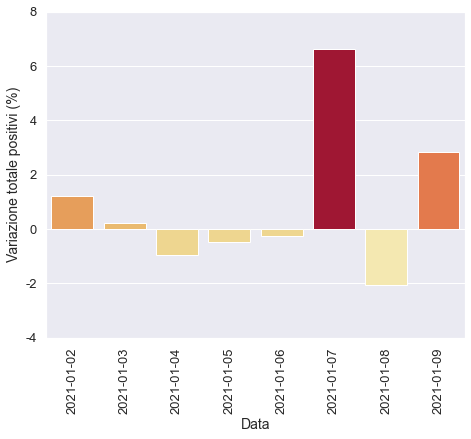

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

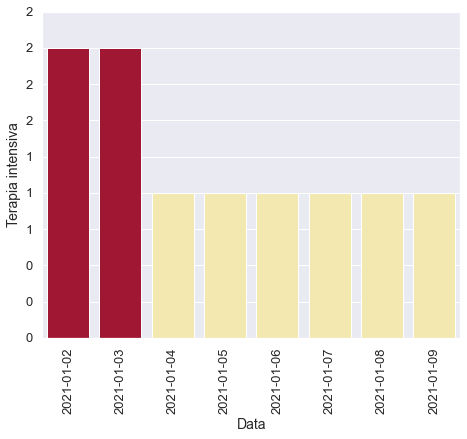

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

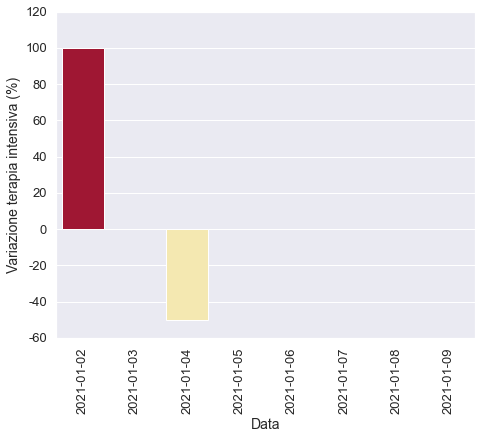

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

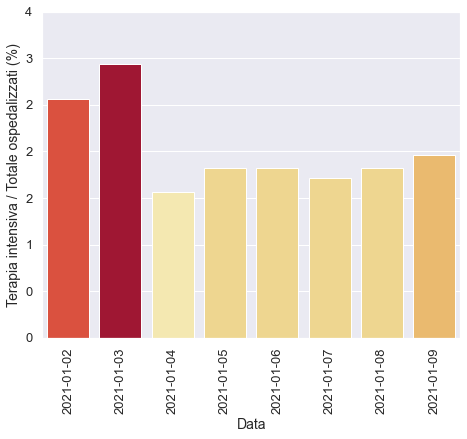

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

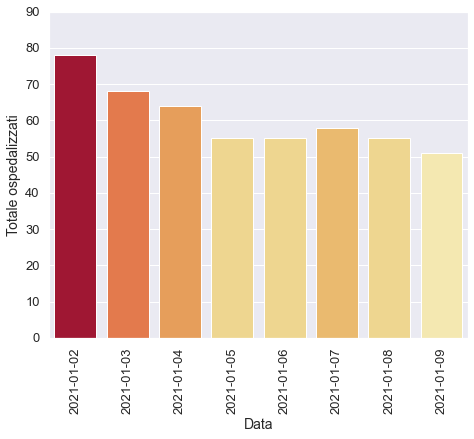

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

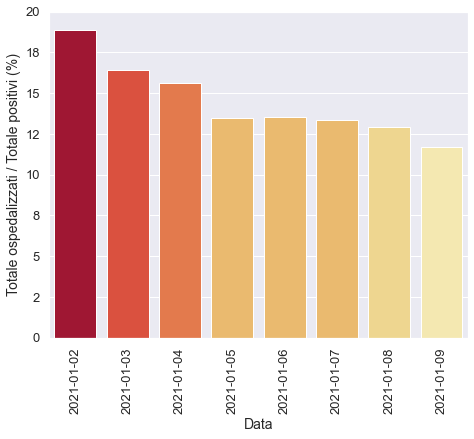

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

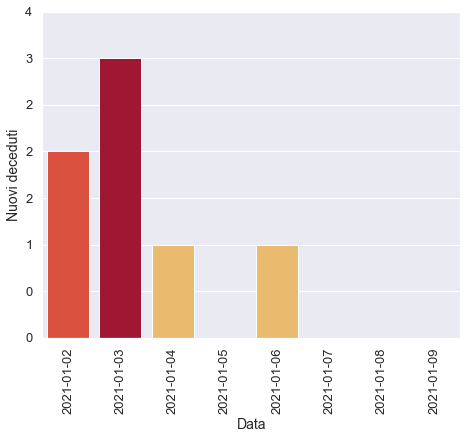

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

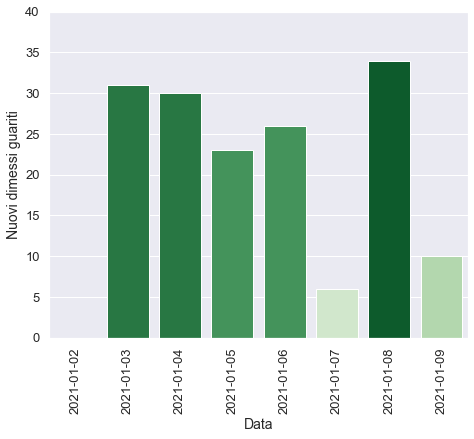

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)